Image Classification Task

Epoch 1/10
469/469 [==============================] - 30s 60ms/step - loss: 0.2344 - accuracy: 0.9316 - val_loss: 0.0904 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0749 - accuracy: 0.9783 - val_loss: 0.0634 - val_accuracy: 0.9784 - lr: 0.0010
Epoch 3/10
469/469 [==============================] - 25s 52ms/step - loss: 0.0501 - accuracy: 0.9856 - val_loss: 0.0551 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 4/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0382 - accuracy: 0.9881 - val_loss: 0.0454 - val_accuracy: 0.9836 - lr: 0.0010
Epoch 5/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0432 - val_accuracy: 0.9858 - lr: 0.0010
Epoch 6/10
469/469 [==============================] - 25s 52ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.0407 - val_accuracy: 0.9867 - lr: 0.0010
Epoch 7/10
469/469 [==============================] - 23s 

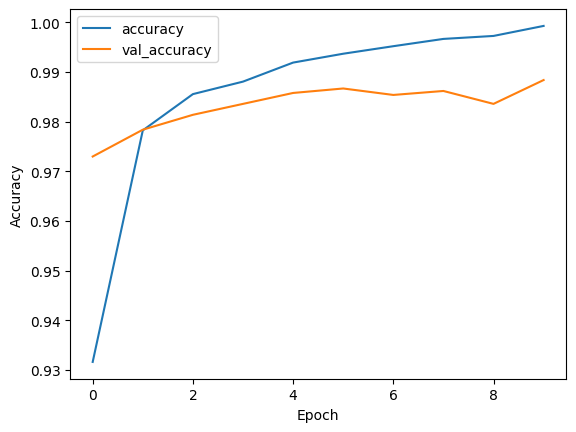

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Define CNN model
def create_model(learning_rate=0.001, optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

# Create model
model = create_model()

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128, callbacks=[reduce_lr])

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Text Classification Task:

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/10
196/196 [==============================] - 23s 102ms/step - loss: 0.5439 - accuracy: 0.7173 - val_loss: 0.3923 - val_accuracy: 0.8331 - lr: 0.0010
Epoch 2/10
196/196 [==============================] - 15s 76ms/step - loss: 0.3216 - accuracy: 0.8717 - val_loss: 0.4508 - val_accuracy: 0.7844 - lr: 0.0010
Epoch 3/10
196/196 [==============================] - 14s 69ms/step - loss: 0.2254 - accuracy: 0.9130 - val_loss: 0.3440 - val_accuracy: 0.8553 - lr: 0.0010
Epoch 4/10
196/196 [==============================] - 14s 69ms/step - loss: 0.1439 - accuracy: 0.9505 - val_loss: 0.4174 - val_accuracy: 0.8492 - lr: 0.0010
Epoch 5/10
196/196 [==============================] - 14s 70ms/step - loss: 0.0948 - accuracy: 0.9700 - val_loss: 0.4392 - val_accuracy: 0.8450 - lr: 0.0010
Epoch 6/10
196/196 [==============================] - 14s 69ms/step - loss: 0.0445 - accuracy: 0.9885 - val_loss: 0.5684 - val_accuracy: 0.8461 - lr:

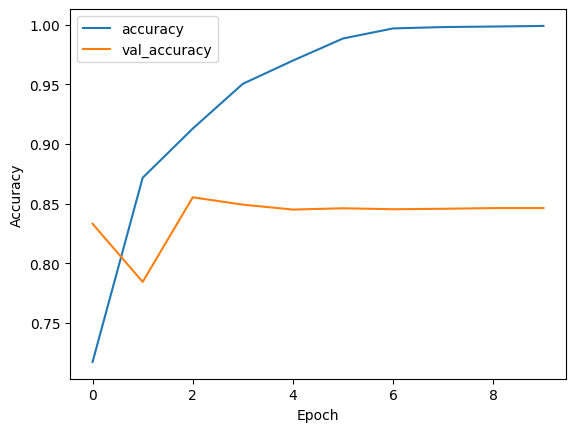

In [3]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV

# Load IMDb movie reviews dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Preprocess the text data
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define RNN model
def create_model(learning_rate=0.001, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(10000, 32))
    model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create model
model = create_model()

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), callbacks=[reduce_lr])

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
